## Sorting Arrays

Now we have been converned mainly with tools to access and operate on array data with NumPy. This will conver algorithms related to sorting values in NumPy arrays. These algorithms are a favorite topic in introductory computer science courses: insertioin sorts, selection sorts, merge sorts, quick sorts, bubble sorts, and many more all are means of accomplishing a similar task: Sorting the values in a list or array.

For example, a simple selection sort repeatedly finds the minimum value from a list, and makes swaps until the lsit is sorted.

In [2]:
# We can code this in just a few lines of Python:

import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [3]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

The selection sort is useful ofr its simplicity, but is much too slow to be useful for larger arrays. For a list of N values, it requires N loops, each of which does on the order of ~N comparisions to find the swap values.

In terms of the "big-O" notation often used to characterize these algorithms, slections sort averages O[N^2]: if you double the nuber of items in the list, the execution time will go up by about a factor of four.

Even selection sort, though, is much better then my all-time favorit sorting algorithms, the *bogosort*:

In [4]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [5]:
x = np.array([2, 1, 4, 3, 5])

bogosort(x)

array([1, 2, 3, 4, 5])

This silly sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted. With an average scaling of O[N x N!] (that's N times N factorial), this should never be used for any real computation.

Fortunately, Python contains built-in sorting algorithms that are much more efficient than either of the simplistic algorithms just shown. We'll start by looking at the Python built-ins, and then take a look at the routines included in NumPy and optimized for NumPy arrays.

## Fast Sorting in NumPy: np.sort and np.argsort

Although Python has built-in sort and sorted functions to work with lists, we won't discuss them here becuse NumPy's np.sort function turns out to be much more efficient and useful for our purposes. By default np.sort uses an O[N log N], quick-sort algorithm, though mergesort and heapsort are also available. For most applications, the default quicksort is more then sufficient.

To return a sorted version of the array without modifying the input, you can use np.sort:

In [6]:
x = np.array([2, 1, 4, 3, 5])

np.sort(x)

array([1, 2, 3, 4, 5])

In [7]:
# You can use sort in place as well

x.sort()

x

array([1, 2, 3, 4, 5])

In [8]:
# A related function is argsort, which instead returns the indices of the sorted elements:

x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)

i

array([1, 0, 3, 2, 4], dtype=int64)

In [9]:
# The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. these indices can then be used (via fancy indexing) to construct the sorted array if desired:

x[i]

array([1, 2, 3, 4, 5])

## Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the axis argument. For example:

In [10]:
rand = np.random.RandomState(42)

X = rand.randint(0, 10, size=(4, 6))

print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [11]:
# sort each column of X

np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [12]:
# to sort each row of X

np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the K smallest values in the array. NumPy provides this in the np.portition function. *np.partition* takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [13]:
x = np.array([7, 2, 3, 1, 6, 5, 4])

np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [14]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Finally, just as there is a np.argsort that computes  indices of the sort, there is a np.argpartition that computes indices of the partition. We’ll see this in action in the following section.

## Example: *K-Nearest Neighbors*

Let's quickly see how we might use this *argsort* function along multiple axes to find the nearest neighbors of each point in a set. We'll start by creating a random set of 10 points on a two-dimensional plane. Uisng the standard convention, we'll arrange these in a 10x 2 array:

In [15]:
X = rand.rand(10, 2)

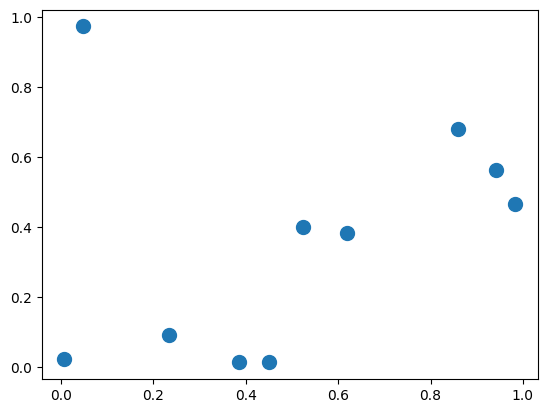

In [16]:
# To get an idea of hwo these points look, let's quickly scatter plot them

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], s = 100)

Now we'll compute the distance between each pair of points. Recall that the squared distance between two points is the sum of the squared differences in each dimension;

We can compute the matrix of squre distances in a single line of code:

In [17]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

This operation has a lot packed into it, and it might be a bit comfusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

In [19]:
# for each pair of points, compute differences in their coordinates

difference = X[:, np.newaxis, :] - X[np.newaxis, :, :]

difference.shape

(10, 10, 2)

In [20]:
# square the coordinate differences

sq_differences = difference ** 2
sq_differences.shape

(10, 10, 2)

In [21]:
# sum the coordinate differences to get the squared distance

dist_sq = sq_differences.sum(-1)

dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [22]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out! With the pairwise square-distances converted, we can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [23]:
nearest = np.argsort(dist_sq, axis= 1)

nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]], dtype=int64)

Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point’s closest neighbor is itself, as we would expect.

By using a full sort here, we’ve actually done more work than we need to in this case. If we’re simply interested in the nearest k neighbors, all we need is to partition each row so that the smallest k + 1 squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the np argpartition function:

In [24]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

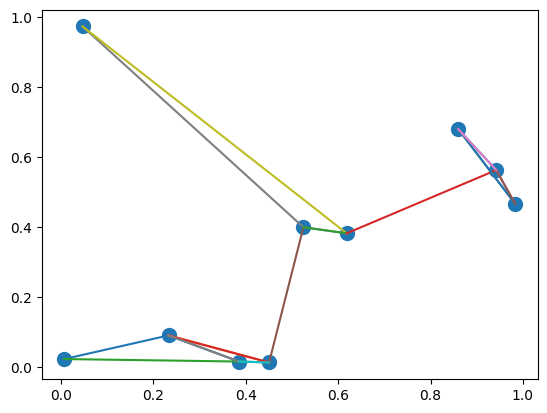

In [26]:
plt.scatter(X[:, 0], X[:, 1], s = 100)

# draw lines from each point to its two nearest neighbors

K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        #plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]))